In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
from Madule import plots
import arviz as az
from scipy import stats


In [3]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_Mixture_notdual_dual_twoLR_Act_Clr_model1_individual.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_HC = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
#log_lik = fit_HC['log_lik']


In [4]:
az.summary(fit_HC)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"hier_alphaAct_pos_mu1[0, 0]",0.552,0.980,-0.696,2.489,0.456,0.346,6.0,26.0,2.03
"hier_alphaAct_pos_mu1[0, 1]",0.415,0.963,-1.739,2.087,0.219,0.157,19.0,79.0,1.45
"hier_alphaAct_pos_mu1[1, 0]",0.914,0.610,-0.321,1.730,0.176,0.128,13.0,109.0,1.20
"hier_alphaAct_pos_mu1[1, 1]",-1.254,3.346,-7.214,1.919,1.639,1.276,6.0,15.0,1.85
"hier_alphaAct_neg_mu1[0, 0]",-1.058,0.800,-2.173,0.452,0.375,0.284,6.0,26.0,1.93
...,...,...,...,...,...,...,...,...,...
"transfer_hier_weight_mu2[1, 1]",0.209,0.323,0.000,0.830,0.159,0.122,7.0,27.0,1.90
"transfer_hier_sensitivity_mu2[0, 0]",0.901,1.428,0.017,3.406,0.713,0.546,5.0,42.0,2.13
"transfer_hier_sensitivity_mu2[0, 1]",0.105,0.097,0.019,0.275,0.042,0.032,5.0,26.0,2.05
"transfer_hier_sensitivity_mu2[1, 0]",0.129,0.127,0.023,0.380,0.063,0.048,5.0,11.0,2.26


In [4]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'PD'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit_PD = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit_PD['log_lik']


In [5]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
weight_HC = fit_HC["transfer_hier_weight_mu"] 
beta_HC = fit_HC["transfer_hier_sensitivity_mu"]

In [6]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
weight_PD = fit_PD["transfer_hier_weight_mu"] 
beta_PD = fit_PD["transfer_hier_sensitivity_mu"]

(0.0, 1.0)

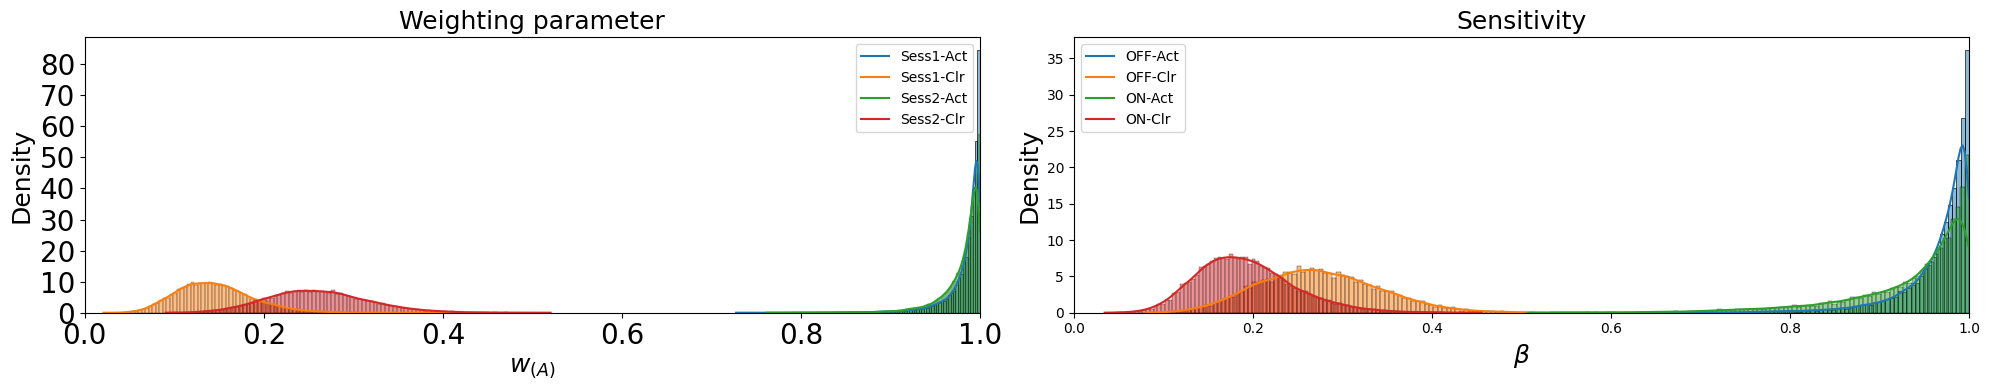

In [9]:
fig = plt.figure(figsize=(20, 4), tight_layout=True)
rows = 1
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weight_HC[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_HC[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 1)

# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(weight_PD[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight_PD[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['OFF-Act', 'OFF-Clr', 'ON-Act', 'ON-Clr']) 
plt.xlim(0, 1)

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(-0.30000000000000004, 0, '−0.3'),
  Text(-0.20000000000000004, 0, '−0.2'),
  Text(-0.10000000000000003, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.09999999999999998, 0, '0.1'),
  Text(0.19999999999999996, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

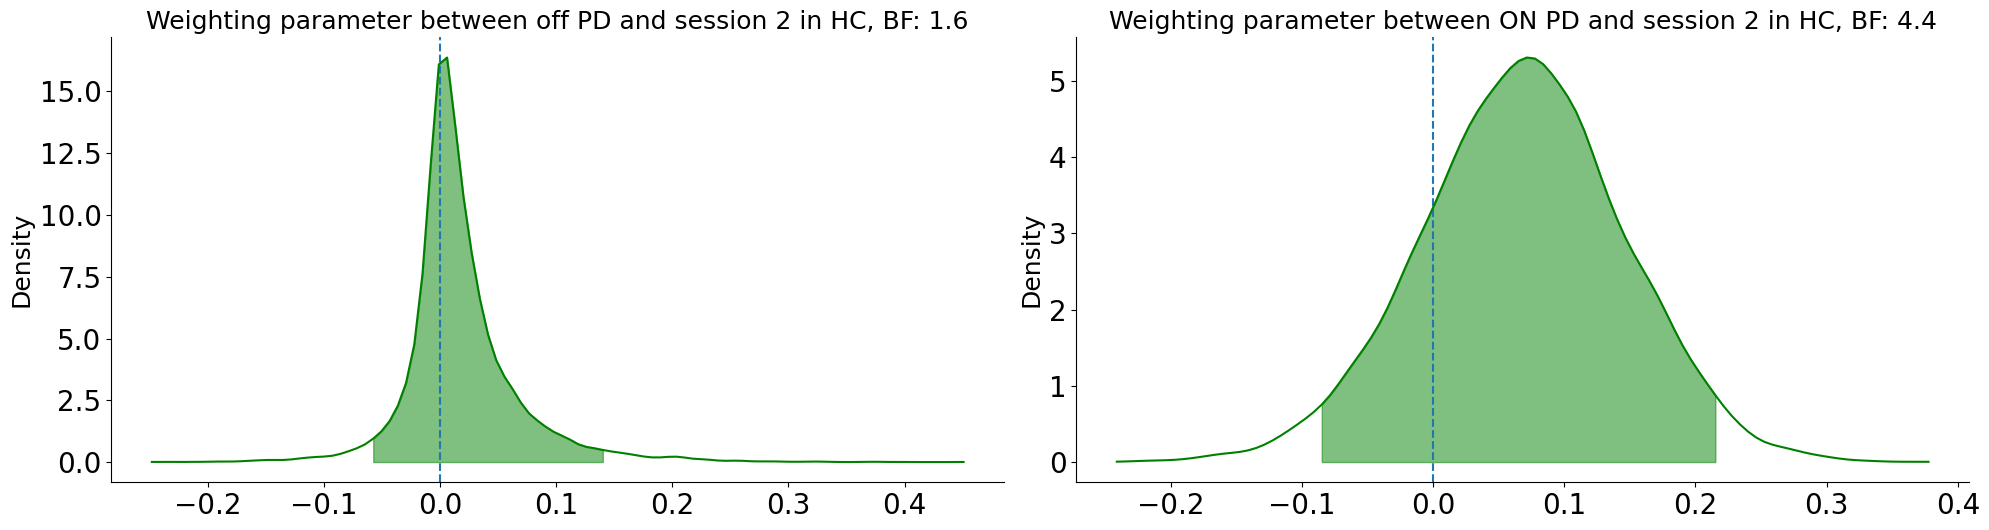

In [12]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight_HC[0,0] - weight_PD[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,0] - weight_PD[0,0])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between off PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Action Learning Rate
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=weight_HC[1,1] - weight_PD[1,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight_HC[1,1] - weight_PD[1,1])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter between ON PD and session 2 in HC, BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


In [29]:
waic = np.array([21262, 21277, 21396,21298, 21281, 21602])

In [30]:
dwaic = waic -np.min(waic)
weight = np.zeros(len(waic))

In [31]:
weight

array([0., 0., 0., 0., 0., 0.])

In [32]:
for i in range(len(waic)):
   weight[i] = np.exp(-dwaic[i]/2)/np.sum(np.exp(-dwaic/2))

In [33]:
weight

array([9.99372443e-01, 5.52737278e-04, 7.97989326e-30, 1.52204221e-08,
       7.48048561e-05, 1.47796941e-74])

In [18]:
np.sum(np.exp(-dwaic/2))

1.0

In [17]:
dwaic

array([  119,   206,     0, 23924])